In [1]:
!pip3 install pickle5
import pandas as pd
import seaborn as sns
import pickle5 as pickle
import matplotlib.pyplot as plt

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-macosx_10_9_x86_64.whl size=126212 sha256=107a6a2acadc7a2a23e556bfd425ade7105d668d7c9d9825aa7ee7a52e26070d
  Stored in directory: /Users/alexanderkell/Library/Caches/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5


In [2]:
reward_dict = pickle.load(open( "/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/testing/rewards.pickle", "rb" ))
reward_dict

{'battery_size': ['1.4',
  '1.8',
  '0.4',
  '1',
  '0.8',
  '0.2',
  '1.6',
  '0.6',
  '2.0',
  '1.2'],
 'reward': [b'Episode #1: reward: -6.164763088034473\nEpisode #2: reward: -6.164763088034473\n',
  b'Episode #1: reward: -0.7910171171518718\nEpisode #2: reward: -0.7910171171518718\n',
  b'Episode #1: reward: -106.84945624382316\nEpisode #2: reward: -106.84945624382316\n',
  b'Episode #1: reward: -12.315391627729484\nEpisode #2: reward: -12.315391627729484\n',
  b'Episode #1: reward: -36.88422987905242\nEpisode #2: reward: -36.88422987905242\n',
  b'Episode #1: reward: -134.1237483637055\nEpisode #2: reward: -134.1237483637055\n',
  b'Episode #1: reward: -1.1126438912521561\nEpisode #2: reward: -1.1126438912521561\n',
  b'Episode #1: reward: -42.97032083394348\nEpisode #2: reward: -42.97032083394348\n',
  b'Episode #1: reward: -0.17817342504575853\nEpisode #2: reward: -0.17817342504575853\n',
  b'Episode #1: reward: -10.629741671847809\nEpisode #2: reward: -10.629741671847809\n'],


In [3]:
reward_dict['reward'] = [float(elem.decode("utf-8").split("reward: ")[1].split("\n")[0]) for elem in reward_dict['reward']]
reward_dict

{'battery_size': ['1.4',
  '1.8',
  '0.4',
  '1',
  '0.8',
  '0.2',
  '1.6',
  '0.6',
  '2.0',
  '1.2'],
 'reward': [-6.164763088034473,
  -0.7910171171518718,
  -106.84945624382316,
  -12.315391627729484,
  -36.88422987905242,
  -134.1237483637055,
  -1.1126438912521561,
  -42.97032083394348,
  -0.17817342504575853,
  -10.629741671847809],
 'directory': ['/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/DDPG_BatteryEnv_46521_00006_6_battery_size=1.4,lr=0.01_2021-03-30_10-35-33/checkpoint_30/checkpoint-30',
  '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/DDPG_BatteryEnv_46521_00008_8_battery_size=1.8,lr=0.01_2021-03-30_12-26-56/checkpoint_30/checkpoint-30',
  '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/models/DDPG_BatteryEnv_46521_00001_1_battery_size=0.4,lr=0.01_2021-03-30_10-35-33/checkpoint_30/checkpoint-30',
  '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/mode

In [4]:
rewards = pd.DataFrame.from_dict(reward_dict)
rewards

,battery_size,reward,directory
0,1.4,-6.164763,/Users/alexanderkell/Documents/PhD/Projects/18...
1,1.8,-0.791017,/Users/alexanderkell/Documents/PhD/Projects/18...
2,0.4,-106.849456,/Users/alexanderkell/Documents/PhD/Projects/18...
3,1,-12.315392,/Users/alexanderkell/Documents/PhD/Projects/18...
4,0.8,-36.884230,/Users/alexanderkell/Documents/PhD/Projects/18...
5,0.2,-134.123748,/Users/alexanderkell/Documents/PhD/Projects/18...
6,1.6,-1.112644,/Users/alexanderkell/Documents/PhD/Projects/18...
7,0.6,-42.970321,/Users/alexanderkell/Documents/PhD/Projects/18...
8,2.0,-0.178173,/Users/alexanderkell/Documents/PhD/Projects/18...
9,1.2,-10.629742,/Users/alexanderkell/Documents/PhD/Projects/18...


In [5]:
rewards['battery_size'] = pd.to_numeric(rewards['battery_size'])
rewards

,battery_size,reward,directory
0,1.4,-6.164763,/Users/alexanderkell/Documents/PhD/Projects/18...
1,1.8,-0.791017,/Users/alexanderkell/Documents/PhD/Projects/18...
2,0.4,-106.849456,/Users/alexanderkell/Documents/PhD/Projects/18...
3,1.0,-12.315392,/Users/alexanderkell/Documents/PhD/Projects/18...
4,0.8,-36.884230,/Users/alexanderkell/Documents/PhD/Projects/18...
5,0.2,-134.123748,/Users/alexanderkell/Documents/PhD/Projects/18...
6,1.6,-1.112644,/Users/alexanderkell/Documents/PhD/Projects/18...
7,0.6,-42.970321,/Users/alexanderkell/Documents/PhD/Projects/18...
8,2.0,-0.178173,/Users/alexanderkell/Documents/PhD/Projects/18...
9,1.2,-10.629742,/Users/alexanderkell/Documents/PhD/Projects/18...


Text(0.5, 1.0, 'Testing reward versus battery size')

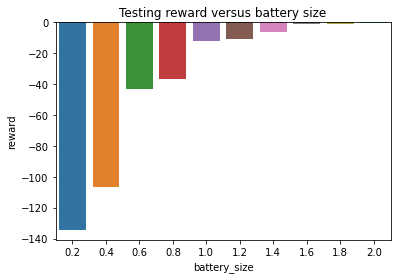

In [6]:
sns.barplot(data=rewards, x="battery_size", y="reward")
plt.title("Testing reward versus battery size")

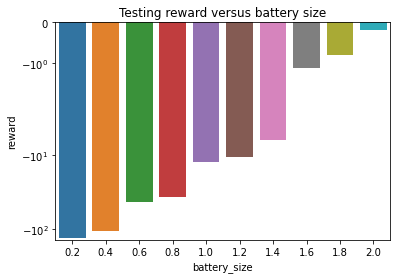

In [7]:
g = sns.barplot(data=rewards, x="battery_size", y="reward")
plt.title("Testing reward versus battery size")
g.set_yscale("symlog")

In [8]:
rewards.to_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/reports/figures/testing_rewards.csv")